In [1]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
device=torch.device('cpu')
print(device)

transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

cpu


In [3]:
train_path='C:/Users/Administrator/Desktop/100v/train'
test_path='C:/Users/Administrator/Desktop/100v/val'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
)



In [4]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['cattle_0800', 'cattle_0900', 'cattle_1000', 'cattle_1300', 'cattle_1400', 'cattle_1600', 'cattle_1700', 'cattle_2000', 'cattle_2320', 'cattle_2700', 'cattle_2710', 'cattle_2900', 'cattle_3000', 'cattle_3100', 'cattle_3200', 'cattle_3300', 'cattle_3812', 'cattle_3814', 'cattle_3819', 'cattle_3842', 'cattle_3844', 'cattle_3856', 'cattle_4208', 'cattle_4323', 'cattle_4347', 'cattle_4369', 'cattle_4537', 'cattle_4539', 'cattle_4678', 'cattle_4679', 'cattle_4680', 'cattle_4716', 'cattle_4748', 'cattle_4775', 'cattle_4804', 'cattle_4819', 'cattle_4840', 'cattle_4921', 'cattle_4947', 'cattle_4969', 'cattle_5009', 'cattle_5066', 'cattle_5073', 'cattle_5077', 'cattle_5090', 'cattle_5112', 'cattle_5133', 'cattle_5197', 'cattle_5207', 'cattle_5273', 'cattle_5275', 'cattle_5283', 'cattle_5314', 'cattle_5362', 'cattle_5408', 'cattle_5427', 'cattle_5432', 'cattle_5604', 'cattle_5605', 'cattle_5620', 'cattle_5633', 'cattle_5634', 'cattle_5639', 'cattle_5658', 'cattle_5670', 'cattle_5677', 'cattle_5

In [5]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=100):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=output.view(-1,32*75*75)
        output=self.fc(output)
        return output

In [6]:
model=ConvNet(num_classes=100).to(device)
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
num_epochs=20
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))
print(train_count,test_count)
best_accuracy=0.0

1151 337


Epoch: 0 Train Loss: tensor(56.1639) Train Accuracy: 0.22849695916594265 Test Accuracy: 0.06824925816023739
Epoch: 1 Train Loss: tensor(12.2245) Train Accuracy: 0.7019982623805386 Test Accuracy: 0.1543026706231454
Epoch: 2 Train Loss: tensor(1.8487) Train Accuracy: 0.9148566463944396 Test Accuracy: 0.7655786350148368
Epoch: 3 Train Loss: tensor(0.4100) Train Accuracy: 0.9591659426585578 Test Accuracy: 0.913946587537092
Epoch: 4 Train Loss: tensor(0.3371) Train Accuracy: 0.9774109470026064 Test Accuracy: 0.9376854599406528
Epoch: 5 Train Loss: tensor(0.4082) Train Accuracy: 0.9643788010425717 Test Accuracy: 0.9317507418397626
Epoch: 6 Train Loss: tensor(0.1496) Train Accuracy: 0.9791485664639444 Test Accuracy: 0.9525222551928784
Epoch: 7 Train Loss: tensor(0.2241) Train Accuracy: 0.9808861859252823 Test Accuracy: 0.9406528189910979
Epoch: 8 Train Loss: tensor(0.1560) Train Accuracy: 0.9904430929626412 Test Accuracy: 0.9584569732937686
Epoch: 9 Train Loss: tensor(0.1237) Train Accuracy: 

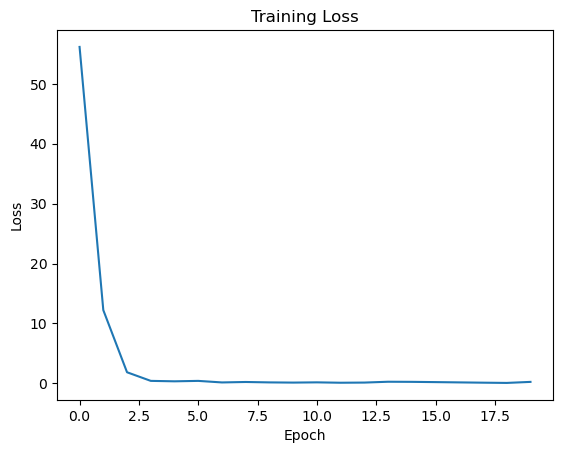

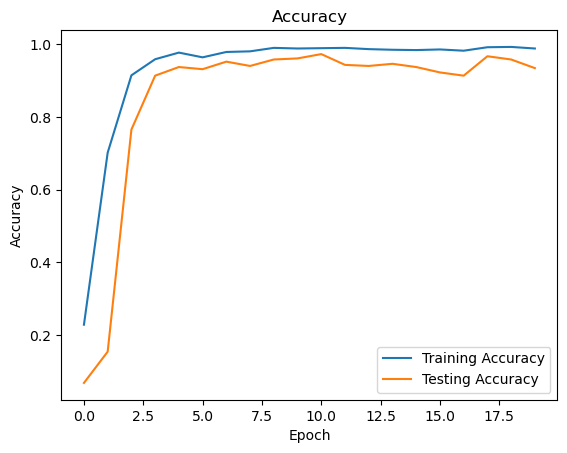

In [7]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    for i, (images,labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.data*images.size(0)
        _,prediction = torch.max(outputs.data,1)
        train_accuracy += int(torch.sum(prediction==labels.data))
    train_accuracy = train_accuracy/train_count
    train_loss = train_loss/train_count
    model.eval()
    
    test_accuracy = 0.0
    for i, (images,labels) in enumerate(test_loader):
        with torch.no_grad():
            outputs = model(images)
        _,prediction = torch.max(outputs.data,1)
        test_accuracy += int(torch.sum(prediction==labels.data))
    test_accuracy = test_accuracy/test_count
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy = test_accuracy
        
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and testing accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

